##GEOWEALTH-US Database EDA

In [1]:
import numpy as np
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

# czone data found at: https://usa.ipums.org/usa/volii/1990lma.shtml
# czone code: https://usa.ipums.org/usa/volii/1990LMAascii.txt

Mounted at /content/drive


In [2]:
path = '/content/drive/My Drive/DAT 490 Capstone Project/Data For Final Results/GEOWEALTH-US/cz_wealth_inequality.csv'
geo = pd.read_csv(path)

print(f'This dataset contains {geo.shape[1]} fields with {geo.shape[0]} observations.\n')
geo.head()

This dataset contains 39 fields with 5174 observations.



,year,czone,obs,households,wealth_mean,wealth_median,wealth_top1,wealth_top.1,wealth_top.01,wealth_top.001,...,mean_sd,top1_sd,top.1_sd,top.01_sd,top.001_sd,top10_sd,bottom50_sd,top5_sd,top.5_sd,gini_sd
0,1960,100,5718,111442.523,81346.374,43386.151,0.173,0.067,0.026,0.012,...,1168.871,0.012,0.014,0.009,0.001,0.008,0.350,0.010,0.012,0.022
1,1960,200,1532,30640.000,78981.281,39427.106,0.187,0.076,0.034,0.017,...,2252.990,0.022,0.030,0.007,0.008,0.014,0.364,0.018,0.023,0.022
2,1960,301,2785,15599.156,52218.709,29895.359,0.137,0.037,0.009,0.004,...,1372.667,0.021,0.018,0.013,0.005,0.013,0.449,0.016,0.023,0.018
3,1960,302,7418,131579.107,78435.801,40363.946,0.165,0.058,0.020,0.008,...,1958.253,0.021,0.021,0.014,0.005,0.013,0.358,0.016,0.021,0.024
4,1960,401,4873,83340.949,88741.443,46561.526,0.176,0.069,0.024,0.010,...,1510.087,0.014,0.013,0.014,0.006,0.009,0.367,0.011,0.015,0.022


In [3]:
print(f'3 of the {len(geo.columns)} fields in this dataset are integers: the year, commuting zone, and number of observations. All of the measures for these records are floats.','\n')
display(pd.DataFrame(data = geo.dtypes, columns = ['Data Types']))

3 of the 39 fields in this dataset are integers: the year, commuting zone, and number of observations. All of the measures for these records are floats. 



,Data Types
year,int64
czone,int64
obs,int64
households,float64
wealth_mean,float64
wealth_median,float64
wealth_top1,float64
wealth_top.1,float64
wealth_top.01,float64
wealth_top.001,float64


### Searching for null values and exploring the `year` and `czone` fields:

In [4]:
print('The only fields containing null values are `own_outright` and `own_mortgage`.\n')
display(pd.DataFrame(data = geo.isna().sum(), columns = ['Number of Null Rows']))

print('\n\n\nThe descriptive statistics for these fields are as follows:\n')
display(geo.loc[:,['own_outright','own_mortgage']].describe())

print('\n\n\nThe null values are all in observations from 1960 and 1970.\n')
display(geo[geo.isnull().any(axis = 1)].loc[:,['year']].value_counts().sort_values())

print('\n\n\nThe count of observations from each decade shows that these two variables aren\'t present in either.\n')
display(geo.loc[:,'year'].value_counts().sort_values())

print('\n\n\nFinally, descriptive statistics for the `czone` field show that the majority of zones appear in all seven decades, with some only appearing in 6.\n')
display(geo.loc[:,'czone'].value_counts().describe())

The only fields containing null values are `own_outright` and `own_mortgage`.



,Number of Null Rows
year,0
czone,0
obs,0
households,0
wealth_mean,0
wealth_median,0
wealth_top1,0
wealth_top.1,0
wealth_top.01,0
wealth_top.001,0





The descriptive statistics for these fields are as follows:



,own_outright,own_mortgage
count,3705.000000,3705.000000
mean,0.311758,0.378254
std,0.076877,0.062391
min,0.065000,0.202000
25%,0.259000,0.335000
50%,0.315000,0.377000
75%,0.367000,0.422000
max,0.560000,0.604000





The null values are all in observations from 1960 and 1970.



,count
year,
1960,728
1970,741





The count of observations from each decade shows that these two variables aren't present in either.



,count
year,
1960,728
1970,741
1980,741
1990,741
2000,741
2010,741
2020,741





Finally, descriptive statistics for the `czone` field show that the majority of zones appear in all seven decades, with some only appearing in 6.



,count
count,741.000000
mean,6.982456
std,0.131375
min,6.000000
25%,7.000000
50%,7.000000
75%,7.000000
max,7.000000


####Visualizing Measures

In [5]:
# Dataframe containing the measures from the dataset, all of which are float data types
print('We begin by viewing a new Dataframe that contains only the measures from the dataset.\n')
geo_float = geo.select_dtypes(include = np.float64)
display(geo_float)

print('\n\n\n The column names are as follows:')
pd.DataFrame(data = geo.select_dtypes(include = np.float64).columns, columns = [''])

We begin by viewing a new Dataframe that contains only the measures from the dataset.



,households,wealth_mean,wealth_median,wealth_top1,wealth_top.1,wealth_top.01,wealth_top.001,wealth_top10,wealth_bottom50,wealth_gini,...,mean_sd,top1_sd,top.1_sd,top.01_sd,top.001_sd,top10_sd,bottom50_sd,top5_sd,top.5_sd,gini_sd
0,111442.523,81346.374,43386.151,0.173,0.067,0.026,0.012,0.464,0.264,0.640,...,1168.871,0.012,0.014,0.009,0.001,0.008,0.350,0.010,0.012,0.022
1,30640.000,78981.281,39427.106,0.187,0.076,0.034,0.017,0.478,0.254,0.664,...,2252.990,0.022,0.030,0.007,0.008,0.014,0.364,0.018,0.023,0.022
2,15599.156,52218.709,29895.359,0.137,0.037,0.009,0.004,0.480,0.580,0.650,...,1372.667,0.021,0.018,0.013,0.005,0.013,0.449,0.016,0.023,0.018
3,131579.107,78435.801,40363.946,0.165,0.058,0.020,0.008,0.484,0.258,0.652,...,1958.253,0.021,0.021,0.014,0.005,0.013,0.358,0.016,0.021,0.024
4,83340.949,88741.443,46561.526,0.176,0.069,0.024,0.010,0.485,0.253,0.667,...,1510.087,0.014,0.013,0.014,0.006,0.009,0.367,0.011,0.015,0.022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5169,3911.926,786083.513,257469.785,0.319,0.166,0.086,0.045,0.623,0.057,0.770,...,63700.305,0.023,0.012,0.006,0.003,0.017,0.005,0.021,0.019,0.019
5170,7136.175,1045926.264,433912.634,0.293,0.152,0.079,0.041,0.577,0.064,0.728,...,101980.456,0.040,0.021,0.011,0.006,0.044,0.007,0.050,0.033,0.021
5171,91196.000,721547.769,244963.422,0.292,0.152,0.079,0.041,0.587,0.053,0.747,...,88783.997,0.058,0.030,0.016,0.008,0.062,0.007,0.070,0.048,0.032
5172,46503.873,698192.300,243969.365,0.300,0.156,0.081,0.042,0.601,0.056,0.756,...,49186.860,0.050,0.027,0.014,0.007,0.032,0.005,0.046,0.043,0.025





 The column names are as follows:


,
0,households
1,wealth_mean
2,wealth_median
3,wealth_top1
4,wealth_top.1
5,wealth_top.01
6,wealth_top.001
7,wealth_top10
8,wealth_bottom50
9,wealth_gini


In [6]:
print('We disaggregate the data into three smaller datasets based on their category: wealth, housing, and demographics.\nThe year variable is included for analysis.\n\n')

wealth_cols = ['year']
housing_cols = ['year']
demographic_cols = ['year']

for col in geo_float.columns[1:]:
  if 'top' in col or col[0] == 'p' or 'wealth' in col or 'sd' in col:
    wealth_cols.append(col)
  elif 'own' in col or 'house' in col or col == 'rent':
    housing_cols.append(col)
  else:
    demographic_cols.append(col)

geo_wealth = geo[wealth_cols]
geo_housing = geo[housing_cols]
geo_dem = geo[demographic_cols]

print('Wealth variables:')
display(geo_wealth.head())
print('\n\nHousing variables:')
display(geo_housing.head())
print('\n\nDemographic variables:')
geo_dem.head()

We disaggregate the data into three smaller datasets based on their category: wealth, housing, and demographics.
The year variable is included for analysis.


Wealth variables:


,year,wealth_mean,wealth_median,wealth_top1,wealth_top.1,wealth_top.01,wealth_top.001,wealth_top10,wealth_bottom50,wealth_gini,...,mean_sd,top1_sd,top.1_sd,top.01_sd,top.001_sd,top10_sd,bottom50_sd,top5_sd,top.5_sd,gini_sd
0,1960,81346.374,43386.151,0.173,0.067,0.026,0.012,0.464,0.264,0.640,...,1168.871,0.012,0.014,0.009,0.001,0.008,0.350,0.010,0.012,0.022
1,1960,78981.281,39427.106,0.187,0.076,0.034,0.017,0.478,0.254,0.664,...,2252.990,0.022,0.030,0.007,0.008,0.014,0.364,0.018,0.023,0.022
2,1960,52218.709,29895.359,0.137,0.037,0.009,0.004,0.480,0.580,0.650,...,1372.667,0.021,0.018,0.013,0.005,0.013,0.449,0.016,0.023,0.018
3,1960,78435.801,40363.946,0.165,0.058,0.020,0.008,0.484,0.258,0.652,...,1958.253,0.021,0.021,0.014,0.005,0.013,0.358,0.016,0.021,0.024
4,1960,88741.443,46561.526,0.176,0.069,0.024,0.010,0.485,0.253,0.667,...,1510.087,0.014,0.013,0.014,0.006,0.009,0.367,0.011,0.015,0.022




Housing variables:


,year,house_value_mean,own,rent,own_outright,own_mortgage,household_size
0,1960,52359.847,0.716,0.284,NaN,NaN,3.646
1,1960,41693.577,0.691,0.309,NaN,NaN,3.646
2,1960,27531.921,0.621,0.379,NaN,NaN,3.903
3,1960,48919.941,0.675,0.325,NaN,NaN,3.562
4,1960,58855.161,0.651,0.349,NaN,NaN,3.521




Demographic variables:


,year,income_mean,college,white,black,hispanic,female,age
0,1960,38396.093,0.130,0.976,0.023,0.0,0.153,47.339
1,1960,33942.795,0.103,0.966,0.033,0.0,0.138,47.118
2,1960,26870.496,0.076,0.972,0.028,0.0,0.170,50.201
3,1960,44163.311,0.172,0.946,0.053,0.0,0.159,46.975
4,1960,47212.478,0.143,0.849,0.151,0.0,0.161,45.455


#### Wealth Measures

The distribution of wealth variables for percentiles represented in the datset:




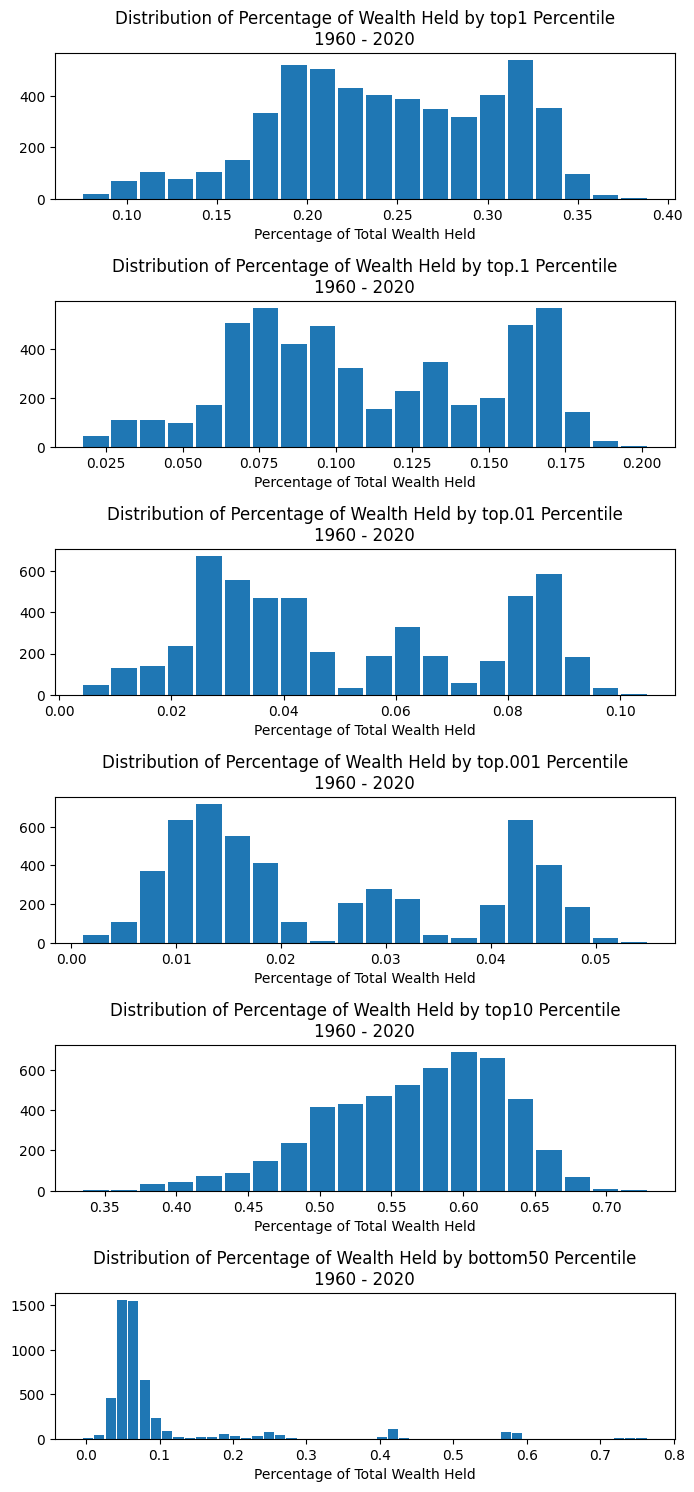

In [7]:
print('The distribution of wealth variables for percentiles represented in the datset:\n\n')
#geo_wealth[[col for col in geo_wealth.columns if 'wealth' in col and ('top' in col or 'bottom' in col)]].hist(grid = False, figsize = (15,15))

fig, axs = plt.subplots(6, figsize = (8, 18))
plt.subplots_adjust(hspace = 0.7)
n = 0

for i in geo_wealth[[col for col in geo_wealth.columns if 'wealth' in col and ('top' in col or 'bottom' in col)]]:
  if i == 'wealth_bottom50':
    axs[n].hist(geo_wealth[i], bins = 50, rwidth = .9)
  else:
    axs[n].hist(geo_wealth[i], bins = 20, rwidth = .9)
  axs[n].set_xlabel('Percentage of Total Wealth Held')
  axs[n].set_title(f'Distribution of Percentage of Wealth Held by {i[i.find("_") + 1:]} Percentile\n1960 - 2020')
  n += 1

In [8]:
print(f"{(len(geo_wealth[geo_wealth['wealth_bottom50'] < 0.1])/len(geo_wealth)) * 100:.3f}% of the records show that the bottom 50% of the population held less than 10% of the wealth.")

86.432% of the records show that the bottom 50% of the population held less than 10% of the wealth.


In [9]:
print('Next, a look at some descriptive statistics concerning the median and mean wealth by year.')
for i in geo_wealth['year'].unique():
  print(f'\nThe distribution of median and mean wealth in {i}:\n')
  display(geo_wealth.loc[geo_wealth['year'] == i].loc[:,['wealth_median','wealth_mean']].describe())

Next, a look at some descriptive statistics concerning the median and mean wealth by year.

The distribution of median and mean wealth in 1960:



,wealth_median,wealth_mean
count,728.000000,728.000000
mean,49678.629563,99799.909530
std,14111.822415,22992.594632
min,9475.086000,43906.260000
25%,38244.925000,81242.500000
50%,49639.266000,100905.655000
75%,60152.661500,117931.611000
max,86926.242000,193005.470000



The distribution of median and mean wealth in 1970:



,wealth_median,wealth_mean
count,741.000000,741.000000
mean,63926.889008,144046.788201
std,17815.941521,35125.921179
min,29114.262000,77469.059000
25%,50167.602000,123014.872000
50%,63672.662000,144159.028000
75%,73595.690000,159475.356000
max,138622.997000,330795.866000



The distribution of median and mean wealth in 1980:



,wealth_median,wealth_mean
count,741.000000,741.000000
mean,87952.110329,212272.107857
std,25393.979869,50810.782203
min,35062.912000,120367.173000
25%,69260.794000,178426.961000
50%,87367.775000,206324.099000
75%,103378.600000,237255.519000
max,205610.044000,486257.675000



The distribution of median and mean wealth in 1990:



,wealth_median,wealth_mean
count,741.000000,741.000000
mean,89871.385860,256512.910509
std,39114.462355,81956.909230
min,36385.032000,117181.896000
25%,67077.950000,213464.117000
50%,83306.549000,240089.493000
75%,98160.514000,277442.868000
max,420927.245000,764461.873000



The distribution of median and mean wealth in 2000:



,wealth_median,wealth_mean
count,741.000000,7.410000e+02
mean,115944.954547,3.473234e+05
std,43319.497228,1.130321e+05
min,45680.355000,1.366055e+05
25%,85977.595000,2.821575e+05
50%,111847.629000,3.296878e+05
75%,134895.637000,3.888012e+05
max,434103.881000,1.028068e+06



The distribution of median and mean wealth in 2010:



,wealth_median,wealth_mean
count,741.000000,7.410000e+02
mean,102101.891916,3.255345e+05
std,44696.939613,1.252253e+05
min,37620.601000,1.451250e+05
25%,77934.524000,2.509248e+05
50%,92172.453000,2.963499e+05
75%,117027.992000,3.716131e+05
max,578469.910000,1.164582e+06



The distribution of median and mean wealth in 2020:



,wealth_median,wealth_mean
count,741.000000,7.410000e+02
mean,167129.135298,5.132585e+05
std,72910.625636,1.904670e+05
min,61205.409000,2.338037e+05
25%,118249.167000,3.741068e+05
50%,148914.144000,4.677502e+05
75%,194197.026000,5.986053e+05
max,656983.766000,1.444330e+06


#### Housing Measures

Average values of housing measures in this dataset:




,house_value_mean,own,rent,own_outright,own_mortgage,household_size
year,,,,,,
1960,54462.205611,0.647567,0.352433,NaN,NaN,3.412111
1970,63077.731783,0.608683,0.391317,NaN,NaN,3.156938
1980,94850.505045,0.625903,0.374097,0.281036,0.344845,2.770155
1990,92075.703626,0.694526,0.305474,0.330874,0.363621,2.660121
2000,115000.710420,0.712426,0.287574,0.301858,0.410561,2.549605
2010,137595.835335,0.701466,0.298534,0.300505,0.400958,2.408414
2020,160702.469799,0.715818,0.284182,0.344517,0.371283,2.362521




A boxplot of the distribution of home ownership by year:




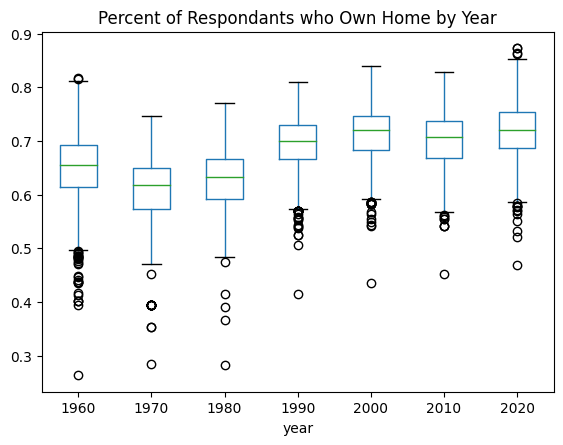

In [10]:
# Some average values by year in the dataset
# Again, the `own_outright` and `own_mortgage` values are null for 1960 and 1970

print('Average values of housing measures in this dataset:\n\n')
display(geo_housing.groupby('year').mean())

print('\n\nA boxplot of the distribution of home ownership by year:\n\n')
geo_housing.boxplot(column = 'own', by = 'year', grid = False)
plt.suptitle('')
plt.title('Percent of Respondants who Own Home by Year');

####Demographic Measures

In [11]:
geo_dem

,year,income_mean,college,white,black,hispanic,female,age
0,1960,38396.093,0.130,0.976,0.023,0.000,0.153,47.339
1,1960,33942.795,0.103,0.966,0.033,0.000,0.138,47.118
2,1960,26870.496,0.076,0.972,0.028,0.000,0.170,50.201
3,1960,44163.311,0.172,0.946,0.053,0.000,0.159,46.975
4,1960,47212.478,0.143,0.849,0.151,0.000,0.161,45.455
...,...,...,...,...,...,...,...,...
5169,2020,84656.720,0.353,0.845,0.000,0.057,0.492,58.390
5170,2020,102824.769,0.562,0.892,0.005,0.029,0.493,59.616
5171,2020,87307.643,0.529,0.832,0.004,0.042,0.501,53.762
5172,2020,75959.682,0.422,0.822,0.003,0.031,0.528,58.616


In [12]:
com_zones = pd.read_csv('https://usa.ipums.org/usa/volii/1990LMAascii.txt', sep = '\t')
print('Commuting Zones and FIPS data taken from usa.ipums.org to use FIPS codes for visualizations:\n\n')
display(com_zones)

print('\n\nThere are "Market Area Total" rows in the data, so we will filter those out.\n\n')
numrows = com_zones.shape[0]
com_zones = com_zones[com_zones['County Name'] != 'Market Area Total']
display(com_zones)

print(f'\n\nThe number of rows reduced from {numrows} to {com_zones.shape[0]} after this change.')

Commuting Zones and FIPS data taken from usa.ipums.org to use FIPS codes for visualizations:




,LMA/CZ,FIPS,County Name,Total Population,Labor Force
0,100,47019.0,"Carter County, TN",51505,24411
1,100,47059.0,"Greene County, TN",55853,28320
2,100,47073.0,"Hawkins County, TN",44565,20894
3,100,47163.0,"Sullivan County, TN",143596,69733
4,100,47171.0,"Unicoi County, TN",16549,7587
...,...,...,...,...,...
3530,39400,53053.0,"Pierce County, WA",586203,293284
3531,39400,53057.0,"Skagit County, WA",79555,36438
3532,39400,53061.0,"Snohomish County, WA",465642,246706
3533,39400,53067.0,"Thurston County, WA",161238,82210




There are "Market Area Total" rows in the data, so we will filter those out.




,LMA/CZ,FIPS,County Name,Total Population,Labor Force
0,100,47019.0,"Carter County, TN",51505,24411
1,100,47059.0,"Greene County, TN",55853,28320
2,100,47073.0,"Hawkins County, TN",44565,20894
3,100,47163.0,"Sullivan County, TN",143596,69733
4,100,47171.0,"Unicoi County, TN",16549,7587
...,...,...,...,...,...
3529,39400,53045.0,"Mason County, WA",38341,15397
3530,39400,53053.0,"Pierce County, WA",586203,293284
3531,39400,53057.0,"Skagit County, WA",79555,36438
3532,39400,53061.0,"Snohomish County, WA",465642,246706




The number of rows reduced from 3535 to 3141 after this change.


In [13]:
print('Joining the com_zones dataframe to the geo dataframe to include the FIPS codes and County Names:\n\n')
geo = geo.merge(right = com_zones, how = 'left', left_on = 'czone', right_on = 'LMA/CZ').drop(['LMA/CZ', 'Total Population', 'Labor Force'], axis = 1)
geo['FIPS'] = geo['FIPS'].astype('int64')
geo.head()

Joining the com_zones dataframe to the geo dataframe to include the FIPS codes and County Names:




,year,czone,obs,households,wealth_mean,wealth_median,wealth_top1,wealth_top.1,wealth_top.01,wealth_top.001,...,top.1_sd,top.01_sd,top.001_sd,top10_sd,bottom50_sd,top5_sd,top.5_sd,gini_sd,FIPS,County Name
0,1960,100,5718,111442.523,81346.374,43386.151,0.173,0.067,0.026,0.012,...,0.014,0.009,0.001,0.008,0.35,0.01,0.012,0.022,47019,"Carter County, TN"
1,1960,100,5718,111442.523,81346.374,43386.151,0.173,0.067,0.026,0.012,...,0.014,0.009,0.001,0.008,0.35,0.01,0.012,0.022,47059,"Greene County, TN"
2,1960,100,5718,111442.523,81346.374,43386.151,0.173,0.067,0.026,0.012,...,0.014,0.009,0.001,0.008,0.35,0.01,0.012,0.022,47073,"Hawkins County, TN"
3,1960,100,5718,111442.523,81346.374,43386.151,0.173,0.067,0.026,0.012,...,0.014,0.009,0.001,0.008,0.35,0.01,0.012,0.022,47163,"Sullivan County, TN"
4,1960,100,5718,111442.523,81346.374,43386.151,0.173,0.067,0.026,0.012,...,0.014,0.009,0.001,0.008,0.35,0.01,0.012,0.022,47171,"Unicoi County, TN"


In [14]:
# Data from the US Census Bureau for visualizations

county_gdf = geopandas.read_file('https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_county_500k.zip')
state_gdf = geopandas.read_file('https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_500k.zip')

In [15]:
print('We look at the structure of the county and state data from the US Census Bureau:\n\n')
print('county_gdf:')
display(county_gdf.head())
print('\nstate_gdf')
display(state_gdf.head())

print('Since we will be concerned primarily with counties in this visualization, we will concatenate the State and County FIP codes to be merged with the US Census Bureau later.\n')
print('Before:')
display(county_gdf[['STATEFP','COUNTYFP']].head())
county_gdf['FIPCODE'] = county_gdf['STATEFP'] + county_gdf['COUNTYFP']
county_gdf['FIPCODE'] = county_gdf['FIPCODE'].astype('int64')
print('\nAfter:')
display(county_gdf[['STATEFP','COUNTYFP','FIPCODE']].head())

print('\n\nWe are only interested in the continental United States, so we will remove FIPS codes from outside of the Continental US.\n')
states_exclude = ['United States Virgin Islands', 'American Samoa', 'Commonwealth of the Northern Mariana Islands', 'Puerto Rico', 'District of Columbia', 'Guam', 'Hawaii', 'Alaska']
county_gdf = county_gdf[~county_gdf['STATE_NAME'].isin(states_exclude)]
state_gdf = state_gdf[~state_gdf['NAME'].isin(states_exclude)]

print('\nAfter removing unwanted states:')
print('\nUnique states in `county_gdf`:')
display(county_gdf['STATE_NAME'].unique())
print('\nUnique states in `county_gdf`:')
display(state_gdf['NAME'].unique())

print(f'\n\nThere are now {len(county_gdf["STATE_NAME"].unique())} unique states in `county_gdf` and {len(state_gdf["NAME"].unique())} unique states in `state_gdf`.')

Output hidden; open in https://colab.research.google.com to view.

In [16]:
# Code modified from HW1 in DAT402 for visualization
county_gdf = county_gdf.merge(right = geo, left_on = 'FIPCODE', right_on = 'FIPS', how = 'left')

# remove null records where FIPS code is not present in geowealth dataset
county_gdf = county_gdf[~county_gdf['year'].isna()]

# convert int dtypes from original geowealth dataset back to int
county_gdf[['year', 'czone', 'obs']] = county_gdf[['year', 'czone', 'obs']].astype(np.int32)

county_gdf = county_gdf.to_crs(5070)
state_gdf = state_gdf.to_crs(5070)


county_gdf_log = county_gdf
county_gdf_log['wealth_median'] = np.log(county_gdf_log['wealth_median'])

for i in county_gdf_log['year'].unique():
  fig, ax1 = plt.subplots(1, 1, figsize=(8,6), dpi=300)

  county_gdf_log[county_gdf_log['year'] == i].plot(ax = ax1, linewidth = .5, edgecolor = 'black', column = 'wealth_median', label = 'wealth_median', legend = True)
  state_gdf.plot(ax = ax1, linewidth = 1, edgecolor = 'black', facecolor='none')
  ax1.set_title(f'Median Household Wealth in {i}\nNatural Log of Median Wealth')

  ax1.set_axis_off()

Output hidden; open in https://colab.research.google.com to view.

####Analysis of Wealth Inequality by State

In [17]:
geo2 = county_gdf[['year', 'FIPCODE', 'County Name', 'STATE_NAME', 'wealth_mean', 'wealth_median', 'wealth_bottom50','wealth_top10','wealth_top1', 'wealth_top.1',
                                'wealth_top.01','wealth_top.001', 'geometry']]

print('Creating a new dataset using the geographical data alongside some of the wealth measures:\n')
geo2.head()

Creating a new dataset using the geographical data alongside some of the wealth measures:



,year,FIPCODE,County Name,STATE_NAME,wealth_mean,wealth_median,wealth_bottom50,wealth_top10,wealth_top1,wealth_top.1,wealth_top.01,wealth_top.001,geometry
0,1960,20161,"Riley County, KS",Kansas,88143.996,10.676268,0.583,0.443,0.118,0.028,0.014,0.009,"POLYGON ((-82124.738 1807458.23, -82132.336 18..."
1,1970,20161,"Riley County, KS",Kansas,130450.926,11.024729,0.072,0.498,0.187,0.076,0.031,0.012,"POLYGON ((-82124.738 1807458.23, -82132.336 18..."
2,1980,20161,"Riley County, KS",Kansas,182790.416,10.989304,0.035,0.561,0.205,0.075,0.028,0.011,"POLYGON ((-82124.738 1807458.23, -82132.336 18..."
3,1990,20161,"Riley County, KS",Kansas,207482.941,11.057398,0.043,0.577,0.231,0.096,0.040,0.017,"POLYGON ((-82124.738 1807458.23, -82132.336 18..."
4,2000,20161,"Riley County, KS",Kansas,302464.875,11.307418,0.041,0.613,0.265,0.123,0.059,0.028,"POLYGON ((-82124.738 1807458.23, -82132.336 18..."


---Identifying Extreme Wealth Inequality within States---

Difference between the Highest and Lowest Median Incomes within each State for each Year:


,1960,1970,1980,1990,2000,2010,2020
STATE_NAME,,,,,,,
California,0.71,0.79,0.89,1.34,1.58,1.49,1.57
New York,1.24,0.90,1.21,1.19,1.04,1.16,0.78
Virginia,0.59,0.80,0.85,1.44,0.98,1.28,1.08
Florida,0.79,1.11,1.12,1.08,1.01,0.85,0.93
Georgia,1.04,0.81,0.69,0.75,0.94,1.01,1.27
Massachusetts,0.75,0.41,0.88,0.80,1.10,1.44,1.08
Arizona,0.68,0.66,1.09,1.30,0.82,0.75,1.07
Arkansas,1.39,0.70,0.98,1.26,0.83,0.61,0.56
Texas,0.76,0.74,0.97,0.67,1.00,1.03,1.13


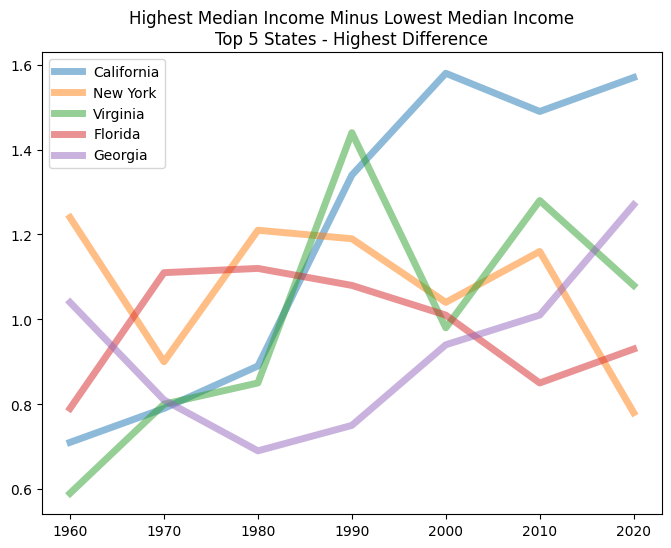

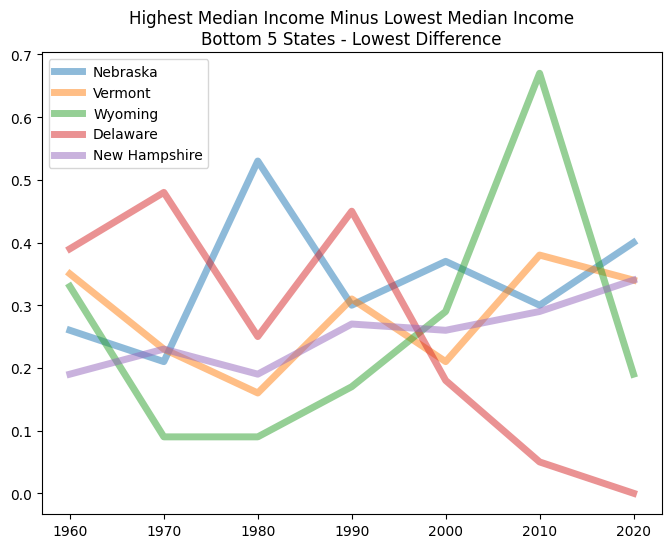

In [18]:
county_median_diff = pd.DataFrame((geo2[geo2['year'] == 1960].groupby(by=geo2['STATE_NAME']).max('wealth_median')['wealth_median'] -\
 geo2[geo2['year'] == 1960].groupby(by=geo2['STATE_NAME']).min('wealth_median')['wealth_median'])\
.round(2).sort_values(ascending = False)).rename(columns = {'wealth_median':1960})

for i in geo2['year'].unique()[1:]:
  county_median_diff[i] = (geo2[geo2['year'] == i].groupby(by=geo2['STATE_NAME']).max('wealth_median')['wealth_median'] -\
  geo2[geo2['year'] == i].groupby(by=geo2['STATE_NAME']).min('wealth_median')['wealth_median'])\
  .round(2).sort_values(ascending = False)

county_median_diff['total'] = county_median_diff.sum(axis = 1)
county_median_diff = county_median_diff.sort_values(by = 'total', ascending = False).drop('total', axis = 1)

print('---Identifying Extreme Wealth Inequality within States---\n\nDifference between the Highest and Lowest Median Incomes within each State for each Year:')
display(county_median_diff)

fig, ax = plt.subplots(1, 1, figsize = (8,6))

ax.plot(county_median_diff.head(5).transpose(), linewidth = 5, alpha = 0.5)
ax.set_title('Highest Median Income Minus Lowest Median Income\nTop 5 States - Highest Difference')
plt.legend(county_median_diff.head(5).index);

fig, ax = plt.subplots(1, 1, figsize = (8,6))

ax.plot(county_median_diff[county_median_diff[1960] != 0].tail(5).transpose(), linewidth = 5, alpha = 0.5)
ax.set_title('Highest Median Income Minus Lowest Median Income\nBottom 5 States - Lowest Difference')
plt.legend(county_median_diff[county_median_diff[1960] != 0].tail(5).index);

In [19]:
state_bottom50 = pd.DataFrame(geo2[(geo2['year'] == 1960) & (geo2['wealth_bottom50'] < .1)].value_counts(subset = geo2['STATE_NAME'])).rename(columns = {'count':1960})

for i in geo2['year'].unique()[1:]:
  state_bottom50[i] = geo2[(geo2['year'] == i) & (geo2['wealth_bottom50'] < .1)].value_counts(subset = geo2['STATE_NAME']).fillna(0)

state_bottom50 = state_bottom50.fillna(value = 0).astype(np.int64)
state_bottom50['total'] = state_bottom50.sum(axis = 1)

print('---Identifying Extreme Wealth Inequality by State---\n\nNumber of Counties with the Bottom Half of Population owning < 10% of the Household Wealth by State:')
state_bottom50.sort_values(by = 'total', ascending = False)

---Identifying Extreme Wealth Inequality by State---

Number of Counties with the Bottom Half of Population owning < 10% of the Household Wealth by State:


,1960,1970,1980,1990,2000,2010,2020,total
STATE_NAME,,,,,,,,
Texas,147,254,237,254,251,254,254,1651
Georgia,59,159,159,159,159,159,153,1007
Virginia,98,133,133,133,133,133,133,896
Kentucky,52,120,108,120,113,120,111,744
Missouri,38,115,87,115,115,115,115,700
Kansas,37,105,101,105,105,105,105,663
Illinois,59,80,102,102,102,102,102,649
North Carolina,38,100,100,100,100,100,100,638
Tennessee,33,95,72,95,95,95,95,580


In [20]:
state_bottom50_perc = state_bottom50.merge(right = geo2['County Name'].groupby(geo2['STATE_NAME']).nunique(), left_on = state_bottom50.index,
                     right_on = geo2['County Name'].groupby(geo2['STATE_NAME']).nunique().index, how = 'left')
state_bottom50_perc[[1960, 1970, 1980, 1990, 2000, 2010, 2020]] = state_bottom50_perc[[1960, 1970, 1980, 1990, 2000, 2010, 2020]].div(state_bottom50_perc['County Name'], axis = 0).round(4)
state_bottom50_perc.index = state_bottom50_perc['key_0']
state_bottom50_perc.index.names = ['State']
state_bottom50_perc = state_bottom50_perc.drop(['key_0', 'total', 'County Name'], axis = 1)
state_bottom50_perc = round(state_bottom50_perc * 100,2)

print('The percentage of counties per state with the bottom half of the population owning < 10% of the household wealth')
state_bottom50_perc

The percentage of counties per state with the bottom half of the population owning < 10% of the household wealth


,1960,1970,1980,1990,2000,2010,2020
State,,,,,,,
Texas,57.87,100.00,93.31,100.0,98.82,100.0,100.00
Virginia,73.68,100.00,100.00,100.0,100.00,100.0,100.00
Florida,89.39,96.97,100.00,100.0,100.00,100.0,100.00
Illinois,57.84,78.43,100.00,100.0,100.00,100.0,100.00
Georgia,37.11,100.00,100.00,100.0,100.00,100.0,96.23
Kentucky,43.33,100.00,90.00,100.0,94.17,100.0,92.50
Alabama,68.66,100.00,95.52,100.0,100.00,100.0,100.00
New York,74.19,95.16,100.00,100.0,100.00,100.0,100.00
California,74.14,100.00,100.00,100.0,100.00,100.0,100.00


In [21]:
geo2_log = geo2
geo2_log['wealth_median'] = np.log10(geo2_log['wealth_median'])

for i in geo2_log['year'].unique():
  fig, ax1 = plt.subplots(1, 1, figsize=(8, 6), dpi=300)

  geo2_log[geo2_log['year'] == i].plot(ax = ax1, linewidth = .5, edgecolor = 'black', column = 'wealth_median', label = 'wealth_bottom50', legend = True)
  state_gdf.plot(ax = ax1, linewidth = 1, edgecolor = 'black', facecolor='none')
  ax1.set_title(f'Percentage of Wealth Owned by\nBottom Half of Households in {i}')
  plt.text(0.5, 0.5, 'Log Base 10 of Wealth Percentage', va = 'bottom', ha = 'center')

  ax1.set_axis_off();

Output hidden; open in https://colab.research.google.com to view.

####Conflict Data

In [22]:
ccc_17_20 = pd.read_csv('drive/My Drive/DAT 490 Capstone Project/Data For Final Results/Crowd Counting Consortium Dataset/ccc_compiled_2017-2020.csv', encoding = 'latin-1', low_memory = False)
display(ccc_17_20.shape)
ccc_17_20.head()

(72181, 70)

,date,locality,state,location_detail,online,type,title,macroevent,actors,organizations,...,source_28,source_29,source_30,notes,lat,lon,resolved_locality,resolved_county,resolved_state,fips_code
0,2017-01-01,Washington,DC,Lafayette Square Park,0.0,vigil,White House Peace Vigil,NaN,NaN,NaN,...,NaN,NaN,NaN,White House Peace Vigil continuous since June ...,38.907192,-77.036871,Washington,District of Columbia,DC,11001.0
1,2017-01-01,Mankato,MN,NaN,0.0,vigil,NaN,NaN,Peace Vigil Mankato,Peace Vigil Mankato,...,NaN,NaN,NaN,every Sunday since 2001,44.163578,-93.999400,Mankato,Blue Earth County,MN,27013.0
2,2017-01-01,Minneapolis,MN,U.S. Bank Stadium,0.0,protest; banner drop,NaN,NaN,general protestors,NaN,...,NaN,NaN,NaN,hung banner from stadium roof during NFL game,44.977753,-93.265011,Minneapolis,Hennepin County,MN,27053.0
3,2017-01-01,Little Compton,RI,Town Green,0.0,vigil,NaN,NaN,Sakonnet Peace Alliance,Sakonnet Peace Alliance,...,NaN,NaN,NaN,every Sunday since 2003,41.510103,-71.171156,Little Compton,Newport County,RI,44005.0
4,2017-01-01,Oak Ridge,TN,Y-12 National Security Complex,0.0,vigil,NaN,NaN,Oak Ridge Environmental Peace Alliance,Oak Ridge Environmental Peace Alliance,...,NaN,NaN,NaN,every Sunday since the late 1990s,36.010356,-84.269645,Oak Ridge,Anderson County,TN,47001.0


In [23]:
ccc_21 = pd.read_csv('drive/My Drive/DAT 490 Capstone Project/Data For Final Results/Crowd Counting Consortium Dataset/ccc_compiled_2021-present.csv', encoding = 'latin-1', low_memory = False)
display(ccc_21.shape)
ccc_21.head()

(128672, 70)

,date,locality,state,location_detail,online,type,title,macroevent,actors,organizations,...,source_28,source_29,source_30,notes,lat,lon,resolved_locality,resolved_county,resolved_state,fips_code
0,2021-01-01,Montgomery,AL,statewide,0.0,strike; boycott,NaN,NaN,Free Alabama Movement; prisoners,Free Alabama Movement,...,NaN,NaN,NaN,Scheduled to run 30 days.,32.379223,-86.307737,Montgomery,Montgomery County,AL,1101.0
1,2021-01-01,Tucson,AZ,E Speedway Blvd and N Euclid Ave,0.0,vigil,NaN,NaN,Women in Black,Women in Black,...,NaN,NaN,NaN,every Friday since at least 2001; organizers c...,32.253979,-110.974177,Tucson,Pima County,AZ,4019.0
2,2021-01-01,Lafayette,CA,El Curtola Blvd & Highway 24,0.0,demonstration,NaN,NaN,Contra Costa County Patriots,Contra Costa County Patriots,...,NaN,NaN,NaN,NaN,37.885758,-122.118020,Lafayette,Contra Costa County,CA,6013.0
3,2021-01-01,Palo Alto,CA,El Camino Real and Embarcadero Rd,0.0,vigil,NaN,NaN,WILPF,WILPF,...,NaN,NaN,NaN,"every Friday; started in 1922, some gaps since",37.441883,-122.143019,Palo Alto,Santa Clara County,CA,6085.0
4,2021-01-01,Pasadena,CA,Rose Bowl Stadium,0.0,rally; parade,Patriots' Rose Parade,NaN,Trump Unity Bridge SO CAL Events; Trump suppor...,Trump Unity Bridge SO CAL Events,...,NaN,NaN,NaN,Patriots' Rose Parade,34.147785,-118.144515,Pasadena,Los Angeles County,CA,6037.0


In [24]:
print('Combining Data Sets')
ccc = pd.concat([ccc_17_20, ccc_21])
# `year` and `month` column for use in analysis
ccc['year'] = ccc['date'].str[:4]
ccc['month'] = ccc['date'].str[5:7]
ccc[['year', 'month']] = ccc[['year', 'month']].astype(np.int64)

display(ccc.shape)
display(ccc.info())
ccc.head()

Combining Data Sets


(200853, 72)

<class 'pandas.core.frame.DataFrame'>
Index: 200853 entries, 0 to 128671
Data columns (total 72 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   date                  200853 non-null  object 
 1   locality              200782 non-null  object 
 2   state                 200799 non-null  object 
 3   location_detail       182867 non-null  object 
 4   online                200747 non-null  float64
 5   type                  200385 non-null  object 
 6   title                 53409 non-null   object 
 7   macroevent            9014 non-null    object 
 8   actors                171479 non-null  object 
 9   organizations         99045 non-null   object 
 10  participants          32911 non-null   object 
 11  claims                200830 non-null  object 
 12  valence               200795 non-null  float64
 13  issues                195046 non-null  object 
 14  issues_major          125321 non-null  object 
 15  size_

None

,date,locality,state,location_detail,online,type,title,macroevent,actors,organizations,...,source_30,notes,lat,lon,resolved_locality,resolved_county,resolved_state,fips_code,year,month
0,2017-01-01,Washington,DC,Lafayette Square Park,0.0,vigil,White House Peace Vigil,NaN,NaN,NaN,...,NaN,White House Peace Vigil continuous since June ...,38.907192,-77.036871,Washington,District of Columbia,DC,11001.0,2017,1
1,2017-01-01,Mankato,MN,NaN,0.0,vigil,NaN,NaN,Peace Vigil Mankato,Peace Vigil Mankato,...,NaN,every Sunday since 2001,44.163578,-93.999400,Mankato,Blue Earth County,MN,27013.0,2017,1
2,2017-01-01,Minneapolis,MN,U.S. Bank Stadium,0.0,protest; banner drop,NaN,NaN,general protestors,NaN,...,NaN,hung banner from stadium roof during NFL game,44.977753,-93.265011,Minneapolis,Hennepin County,MN,27053.0,2017,1
3,2017-01-01,Little Compton,RI,Town Green,0.0,vigil,NaN,NaN,Sakonnet Peace Alliance,Sakonnet Peace Alliance,...,NaN,every Sunday since 2003,41.510103,-71.171156,Little Compton,Newport County,RI,44005.0,2017,1
4,2017-01-01,Oak Ridge,TN,Y-12 National Security Complex,0.0,vigil,NaN,NaN,Oak Ridge Environmental Peace Alliance,Oak Ridge Environmental Peace Alliance,...,NaN,every Sunday since the late 1990s,36.010356,-84.269645,Oak Ridge,Anderson County,TN,47001.0,2017,1


In [25]:
numrows = len(ccc)
ccc = ccc.loc[~ccc['fips_code'].isna()]
ccc['fips_code'] = ccc['fips_code'].astype(np.int64)
print(f'After removing rows with nulls in the `fips_code` column, the number of rows reduced from {numrows} to {len(ccc)}.');

After removing rows with nulls in the `fips_code` column, the number of rows reduced from 200853 to 200621.


<ipython-input-25-dab908951e8b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ccc['fips_code'] = ccc['fips_code'].astype(np.int64)


In [26]:
print('This dataset shows that the recorded protests from 2017 to present were mostly non-violent.\n\n')
display(ccc['arrests_any'].value_counts())
display(ccc['property_damage_any'].value_counts())
display(ccc['injuries_crowd_any'].value_counts())
display(ccc['injuries_police_any'].value_counts())
print(f"\n\nJust {(ccc['arrests_any'].value_counts()[1] / ccc['arrests_any'].value_counts().sum()) * 100:.2f}% of protests included arrests, \
{(ccc['property_damage_any'].value_counts()[1] / ccc['property_damage_any'].value_counts().sum()) * 100:.2f}% included property damage, \
{(ccc['injuries_crowd_any'].value_counts()[1] / ccc['injuries_crowd_any'].value_counts().sum()) * 100:.2f}% included injuries to the crowd, and \
{(ccc['injuries_police_any'].value_counts()[1] / ccc['injuries_police_any'].value_counts().sum()) * 100:.2f}% included injuries to police.")

This dataset shows that the recorded protests from 2017 to present were mostly non-violent.




,count
arrests_any,
0,196833
1,3788


,count
property_damage_any,
0,199270
1,1351


,count
injuries_crowd_any,
0,199622
1,999


,count
injuries_police_any,
0,200255
1,366




Just 1.89% of protests included arrests, 0.67% included property damage, 0.50% included injuries to the crowd, and 0.18% included injuries to police.


In [28]:
v1 = ccc[['arrests_any']].value_counts()
v2 = ccc[['property_damage_any']].value_counts().rename({'count':'property damage'})
v3 = ccc[['injuries_crowd_any']].value_counts().rename({'count':'crowd injuries'})
v4 = ccc[['injuries_police_any']].value_counts().rename({'count':'police injuries'})

ccc_violence = pd.DataFrame(data = [v1, v2, v3, v4], index = ['arrests', 'property damage', 'crowd injuries', 'police injuries']).transpose()
display(ccc_violence)

,arrests,property damage,crowd injuries,police injuries
0,196833,199270,199622,200255
1,3788,1351,999,366


In [29]:
print('The fields containing size of the crowd had a very large number of null values, so we decided not to use the size of the crowd as a variable in this analysis.\n')
ccc[['size_text', 'size_low', 'size_high', 'size_mean']].isna().sum().rename('count null')

The fields containing size of the crowd had a very large number of null values, so we decided not to use the size of the crowd as a variable in this analysis.



,count null
size_text,126898
size_low,120330
size_high,120363
size_mean,120330


In [30]:
ccc_states = ccc[['state','year']][~ccc['state'].isin(['PR'])].groupby('year').value_counts().reset_index()
ccc_states = ccc_states.pivot(index = 'state', columns = 'year', values = 'count')
ccc_states['total'] = ccc_states.sum(axis = 1)
ccc_states = ccc_states.sort_values(by = 'total', ascending = False).drop('total', axis = 1)[:-4]
ccc_states

year,2017,2018,2019,2020,2021,2022,2023,2024
state,,,,,,,,
CA,1266.0,2602.0,1563.0,3726.0,4592.0,5635.0,4765.0,4558.0
NY,981.0,1849.0,1056.0,3097.0,3738.0,3776.0,3348.0,3518.0
MA,374.0,730.0,500.0,987.0,1270.0,1422.0,1585.0,2040.0
PA,452.0,879.0,422.0,1467.0,1192.0,1409.0,1258.0,929.0
DC,603.0,643.0,529.0,804.0,1111.0,1413.0,1579.0,1324.0
IL,254.0,677.0,333.0,1046.0,1271.0,1833.0,1367.0,769.0
WA,301.0,698.0,509.0,1036.0,1033.0,1552.0,1001.0,1149.0
FL,415.0,962.0,430.0,1102.0,958.0,1114.0,1102.0,726.0
TX,424.0,896.0,383.0,977.0,894.0,1141.0,1092.0,777.0


year,2017,2018,2019,2020,2021,2022,2023,2024
mean,212.29,421.47,223.47,554.47,572.73,735.20,625.41,566.25
std,229.71,452.57,267.02,679.25,814.51,949.46,822.61,817.98
min,26.00,44.00,16.00,51.00,44.00,40.00,26.00,10.00
25%,67.50,143.50,71.50,180.00,160.50,190.00,149.00,112.00
50%,144.00,271.00,140.00,352.00,328.00,447.00,420.00,342.00
75%,259.50,598.50,269.50,693.50,673.50,882.50,731.00,680.50
max,1266.00,2602.00,1563.00,3726.00,4592.00,5635.00,4765.00,4558.00


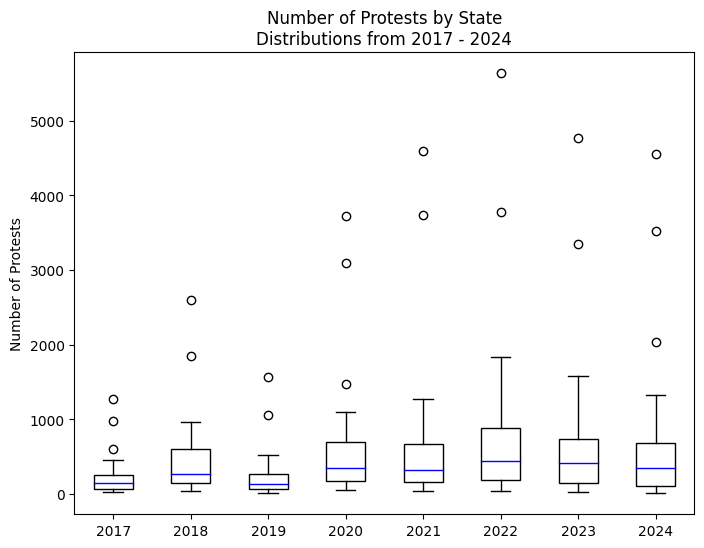

In [31]:
fig, ax1 = plt.subplots(1, 1, figsize = (8, 6))

ax1.boxplot(ccc_states, labels = ccc_states.columns, patch_artist = True, boxprops = dict(facecolor = 'white'), medianprops = dict(color = 'blue'))
ax1.set_title('Number of Protests by State\nDistributions from 2017 - 2024')
ax1.set_ylabel('Number of Protests');

ccc_states.describe().iloc[1:8,:].round(2)

##GEOWEALTH-US Database Methodology

In [32]:
# RUN ALL CODE BEFORE THIS CELL

In [33]:
wealth_dist = geo2[['year', 'FIPCODE', 'County Name', 'STATE_NAME'] + [i for i in geo2.columns if i[:6] == 'wealth']]
wealth_dist

,year,FIPCODE,County Name,STATE_NAME,wealth_mean,wealth_median,wealth_bottom50,wealth_top10,wealth_top1,wealth_top.1,wealth_top.01,wealth_top.001
0,1960,20161,"Riley County, KS",Kansas,88143.996,1.028419,0.583,0.443,0.118,0.028,0.014,0.009
1,1970,20161,"Riley County, KS",Kansas,130450.926,1.042368,0.072,0.498,0.187,0.076,0.031,0.012
2,1980,20161,"Riley County, KS",Kansas,182790.416,1.040970,0.035,0.561,0.205,0.075,0.028,0.011
3,1990,20161,"Riley County, KS",Kansas,207482.941,1.043653,0.043,0.577,0.231,0.096,0.040,0.017
4,2000,20161,"Riley County, KS",Kansas,302464.875,1.053363,0.041,0.613,0.265,0.123,0.059,0.028
...,...,...,...,...,...,...,...,...,...,...,...,...
21726,1980,19193,"Woodbury County, IA",Iowa,230144.538,1.063167,0.080,0.502,0.183,0.066,0.025,0.009
21727,1990,19193,"Woodbury County, IA",Iowa,257111.482,1.056076,0.062,0.567,0.233,0.098,0.041,0.017
21728,2000,19193,"Woodbury County, IA",Iowa,320638.644,1.065452,0.062,0.583,0.266,0.126,0.060,0.029
21729,2010,19193,"Woodbury County, IA",Iowa,267515.754,1.055974,0.050,0.624,0.319,0.164,0.085,0.044


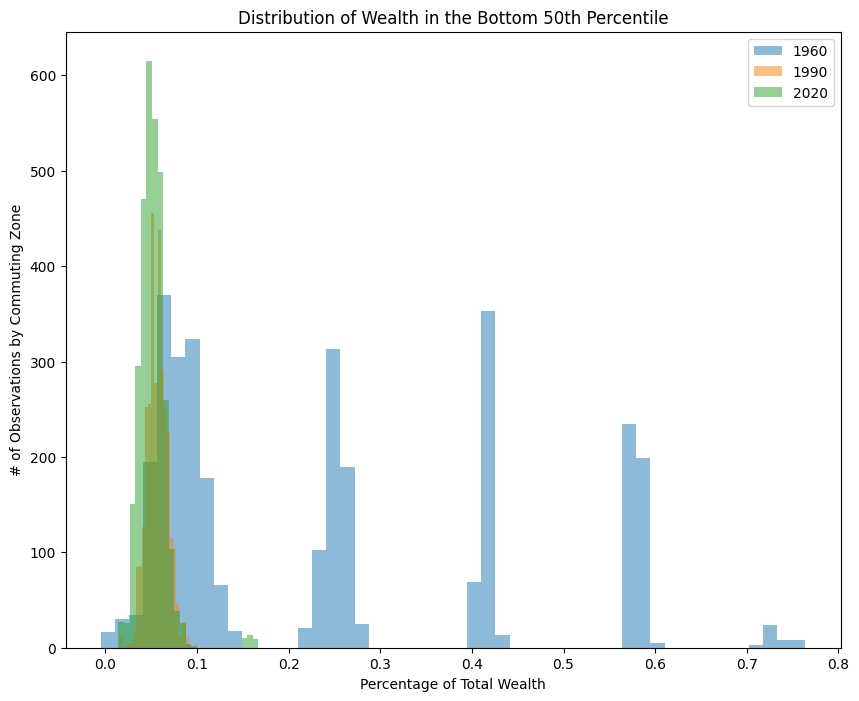

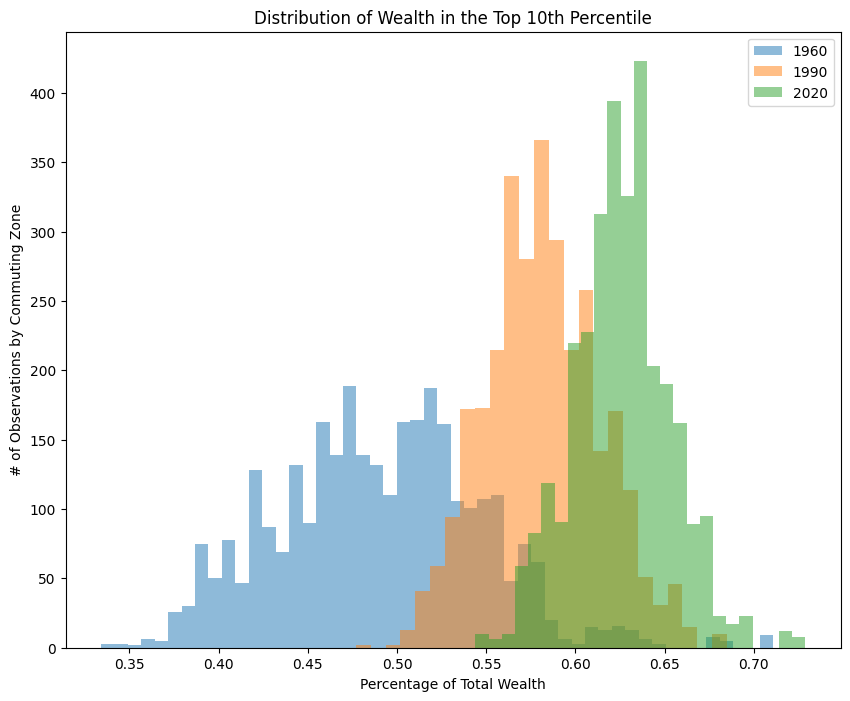

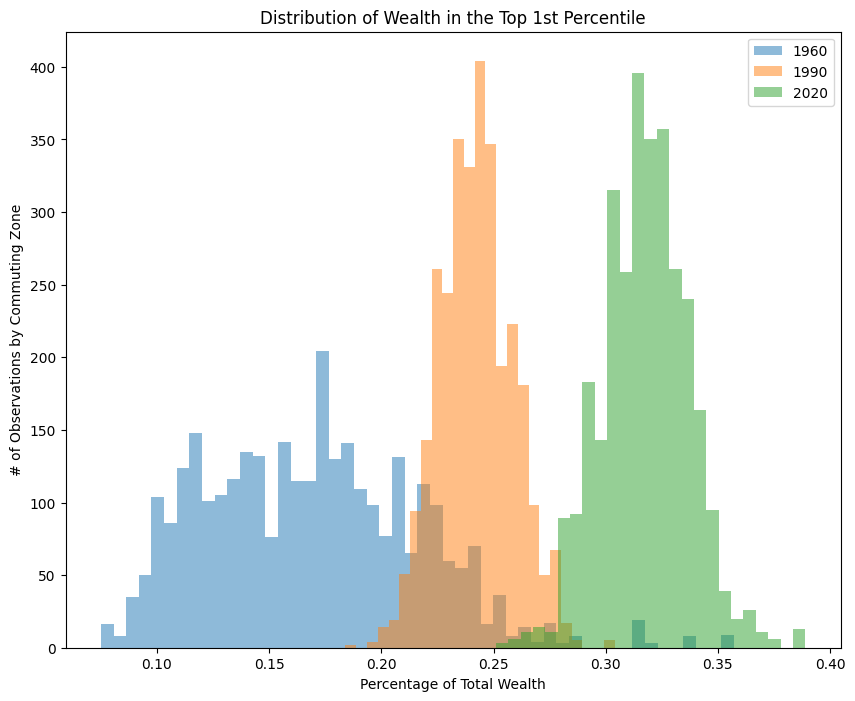

In [34]:
fig, ax = plt.subplots(1, 1, figsize = (10,8))

ax.hist(wealth_dist[wealth_dist['year'] == 1960]['wealth_bottom50'], alpha = .5, label = '1960', bins = 50)
ax.hist(wealth_dist[wealth_dist['year'] == 1990]['wealth_bottom50'], alpha = .5, label = '1990', bins = 25)
ax.hist(wealth_dist[wealth_dist['year'] == 2020]['wealth_bottom50'], alpha = .5, label = '2020', bins = 25)
ax.legend()
ax.set_title('Distribution of Wealth in the Bottom 50th Percentile')
ax.set_xlabel('Percentage of Total Wealth')
ax.set_ylabel('# of Observations by Commuting Zone');

fig, ax = plt.subplots(1, 1, figsize = (10,8))

ax.hist(wealth_dist[wealth_dist['year'] == 1960]['wealth_top10'], alpha = .5, label = '1960', bins = 50)
ax.hist(wealth_dist[wealth_dist['year'] == 1990]['wealth_top10'], alpha = .5, label = '1990', bins = 25)
ax.hist(wealth_dist[wealth_dist['year'] == 2020]['wealth_top10'], alpha = .5, label = '2020', bins = 25)
ax.legend()
ax.set_title('Distribution of Wealth in the Top 10th Percentile')
ax.set_xlabel('Percentage of Total Wealth')
ax.set_ylabel('# of Observations by Commuting Zone');

fig, ax = plt.subplots(1, 1, figsize = (10,8))

ax.hist(wealth_dist[wealth_dist['year'] == 1960]['wealth_top1'], alpha = .5, label = '1960', bins = 50)
ax.hist(wealth_dist[wealth_dist['year'] == 1990]['wealth_top1'], alpha = .5, label = '1990', bins = 25)
ax.hist(wealth_dist[wealth_dist['year'] == 2020]['wealth_top1'], alpha = .5, label = '2020', bins = 25)
ax.legend()
ax.set_title('Distribution of Wealth in the Top 1st Percentile')
ax.set_xlabel('Percentage of Total Wealth')
ax.set_ylabel('# of Observations by Commuting Zone');

In [35]:
med_czone = geo[['year', 'czone','wealth_median']]
med_czone

,year,czone,wealth_median
0,1960,100,43386.151
1,1960,100,43386.151
2,1960,100,43386.151
3,1960,100,43386.151
4,1960,100,43386.151
...,...,...,...
21961,2020,39400,326618.379
21962,2020,39400,326618.379
21963,2020,39400,326618.379
21964,2020,39400,326618.379


In [36]:
med_czone_pivot = med_czone.drop_duplicates().pivot(index = 'czone', columns = 'year', values = 'wealth_median')
med_czone_pivot

year,1960,1970,1980,1990,2000,2010,2020
czone,,,,,,,
100,43386.151,53229.637,81659.084,75510.110,101695.681,88809.135,125866.861
200,39427.106,35325.262,75491.412,76009.102,94889.755,86250.568,157452.376
301,29895.359,37734.438,49434.231,53952.428,58429.053,64587.398,77670.068
302,40363.946,54348.986,75805.657,76416.216,107228.004,94777.756,162149.303
401,46561.526,63048.645,83181.284,94570.551,117582.605,90863.091,155186.235
...,...,...,...,...,...,...,...
39205,59568.020,67963.302,95117.017,86757.954,134895.637,142295.116,257469.785
39301,69444.902,95921.268,144710.893,152680.875,224031.814,219139.599,433912.634
39302,67879.585,95710.637,98863.433,133018.937,159448.350,164000.358,244963.422


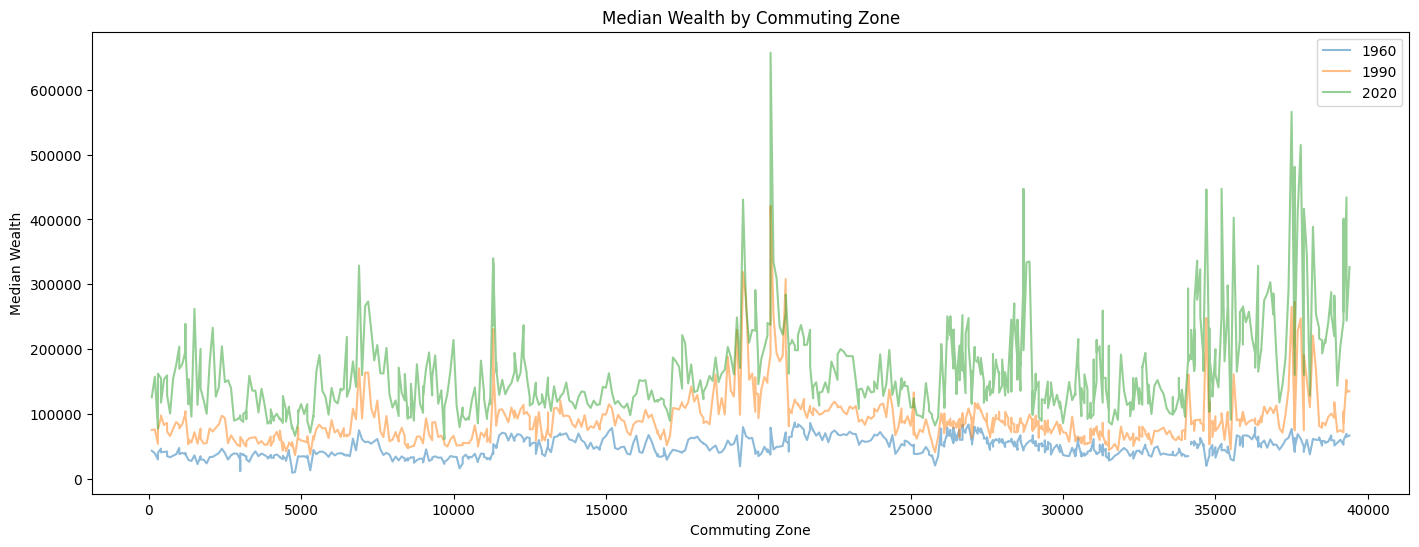

In [37]:
fig, ax = plt.subplots(1, 1, figsize = (17,6))

ax.plot(med_czone_pivot[[1960, 1990, 2020]], linewidth = 1.5, alpha = 0.5)
plt.legend(med_czone_pivot[[1960, 1990, 2020]])
ax.set_ylabel('Median Wealth')
ax.set_xlabel('Commuting Zone')
ax.set_title('Median Wealth by Commuting Zone');